In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# consts and logs init
alp = 0.01
true_sig = [1., -1., 0., -.075, 4., -3.1]
n = len(true_sig)

C_log = []

In [19]:
def foo_gen(x):
    true_res = np.dot(x, true_sig)
    return true_res + 2. * np.random.random_sample() - 1.


def loss(y_hat1, y):
    return 1/len(y) * np.sqrt(np.sum((y_hat1 - y) ** 2))

In [20]:
# init
import numpy as np
sig = np.random.rand(n)

x_data = np.random.random((30, 5)) * 20 - 10
x_data = np.hstack((np.ones((len(x_data[:, 0]), 1)), x_data))  # adding column with ones to original x data arr
y = foo_gen(x_data)

pd.DataFrame(x_data).head()

,0,1,2,3,4,5
0,1.0,-5.069659,1.071728,-5.550442,-1.098673,5.685490
1,1.0,-5.044225,-7.032026,-7.061947,4.083307,8.994404
2,1.0,-8.104150,-4.190314,-8.107692,9.659020,-1.317177
3,1.0,-2.005937,1.171825,3.676898,0.430275,6.854725
4,1.0,1.656976,-4.559027,-8.336441,7.893892,-0.432526


In [21]:
pd.DataFrame(y).head()

,0
0,-16.081200
1,-5.522985
2,51.884120
3,-17.345808
4,32.337224


In [22]:
# training loop
for i in range(200):
    y_hat = np.dot(x_data, sig)
    C = loss(y_hat, y)
    sig = sig - alp * 1/len(y) * np.dot((y_hat - y), x_data)

    C_log.append(C)

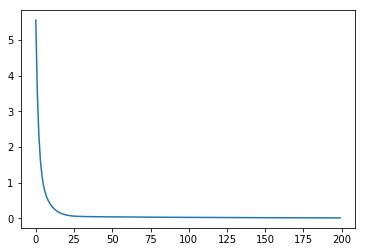

0.010060473299091264
true sig: 
        0
0  1.000
1 -1.000
2  0.000
3 -0.075
4  4.000
5 -3.100
inferred sig: 
        0
0  1.000
1 -1.000
2  0.000
3 -0.075
4  4.000
5 -3.100


In [25]:
plt.plot(C_log)
plt.show()
print(C)
print(f"true sig: \n {pd.DataFrame(true_sig)}")
print(f"inferred sig: \n {pd.DataFrame(true_sig)}")